In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("poushal02/student-academic-stress-real-world-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-academic-stress-real-world-dataset' dataset.
Path to dataset files: /kaggle/input/student-academic-stress-real-world-dataset


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [6]:
StudentStress = pd.read_csv("/content/drive/MyDrive/StudentStressData/academic Stress level - maintainance 1.csv")

In [7]:
df = StudentStress.copy()

In [8]:
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


Initial motive is to gain some insight on student stress metrics using multivariate analysis. DATA SET HAS A MIXTURE OF CATEGORICAL AND RANKED (1-5) SCORES ON DIFFERENT STRESS RELATED VARIABLES

In [9]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [17]:
df.rename(columns={"Academic pressure from your home": "Academic Pressure"}, inplace=True)
df.rename(columns={"Your Academic Stage": "Academic Stage"}, inplace=True)
df.rename(columns={"What coping strategy you use as a student?": "Coping Strategy"}, inplace=True)
df.rename(columns={"Do you have any bad habits like smoking, drinking on a daily basis?": "Smoke/Drink Regularly"}, inplace=True)

df.rename(columns={"What would you rate the academic  competition in your student life": "Academic Competition"}, inplace=True)
df.rename(columns={"Rate your academic stress index ": "Stress Index"}, inplace=True)

print(df.columns)

Index(['Timestamp', 'Academic Stage', 'Peer pressure', 'Academic Pressure',
       'Study Environment', 'Coping Strategy', 'Smoke/Drink Regularly',
       'Academic Competition', 'Stress Index'],
      dtype='object')


AFTER RENAMING A FEW OF THE COLUMNS FOR SIMPLICITY, TIME TO TO DIVE INTO THE METRICS AND POSSIBLY BUILD A BASIS FOR CORRELATION USING BIVARIATE ANALYSIS AND VISUALIZATIONS

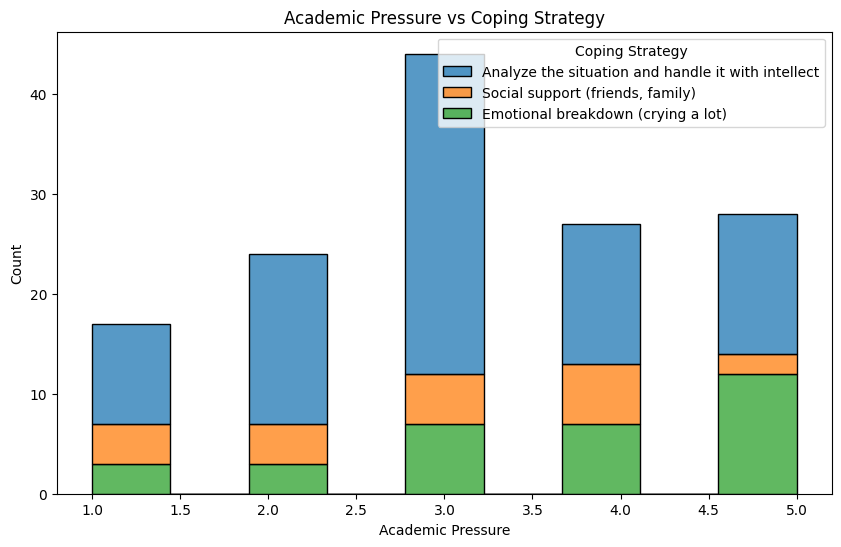

In [12]:
# Histogram for Coping Strategy and Academic Pressure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Academic Pressure', hue='Coping Strategy', multiple='stack')
plt.title('Academic Pressure vs Coping Strategy')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.show()

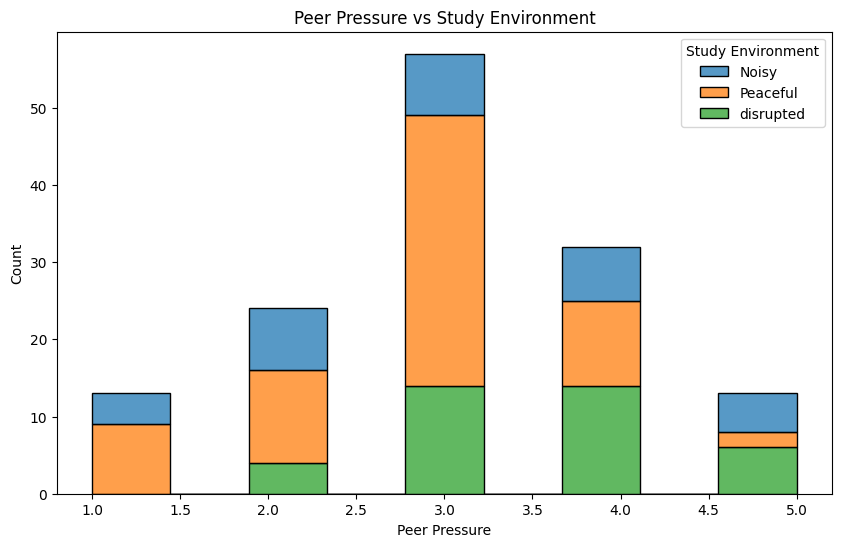

In [13]:
# Histogram for Study Environment and Peer Pressure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Peer pressure', hue='Study Environment', multiple='stack')
plt.title('Peer Pressure vs Study Environment')
plt.xlabel('Peer Pressure')
plt.ylabel('Count')
plt.show()

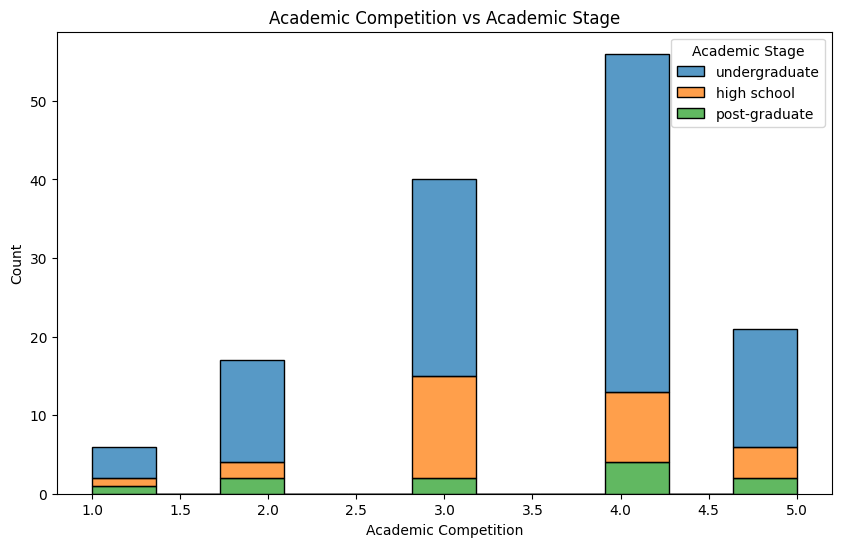

In [18]:
# Histogram for Academic Competition and Academic Stage
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Academic Competition', hue='Academic Stage', multiple='stack')
plt.title('Academic Competition vs Academic Stage')
plt.xlabel('Academic Competition')
plt.ylabel('Count')
plt.show()

Correlation Matrix:


,Peer pressure,Academic Pressure,Academic Competition,Stress Index
Peer pressure,1.000000,0.370275,0.200558,0.474426
Academic Pressure,0.370275,1.000000,0.129759,0.409219
Academic Competition,0.200558,0.129759,1.000000,0.448767
Stress Index,0.474426,0.409219,0.448767,1.000000


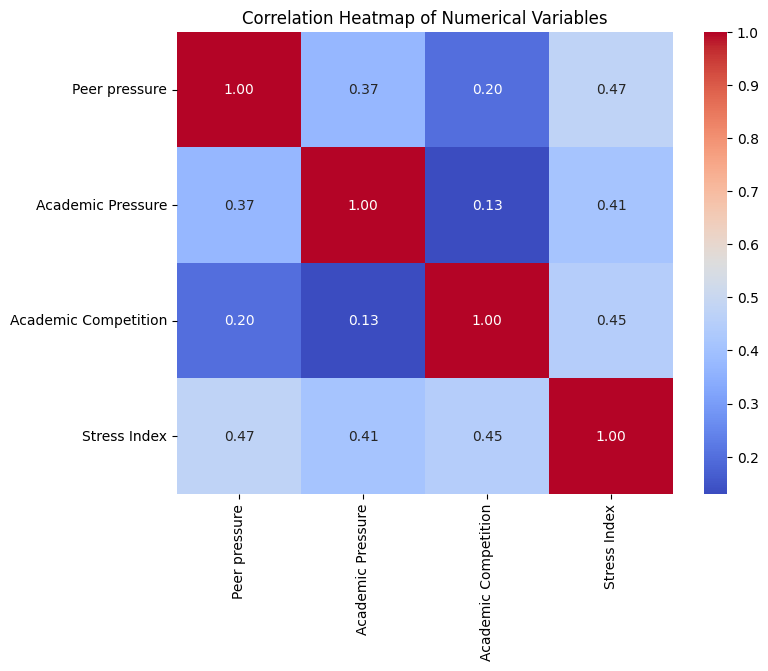

In [19]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Based on the heatmap, we can see that 'Peer pressure', 'Academic Pressure', and 'Academic Competition' all have positive correlations with 'Stress Index'. 'Peer pressure' has the strongest correlation among thes

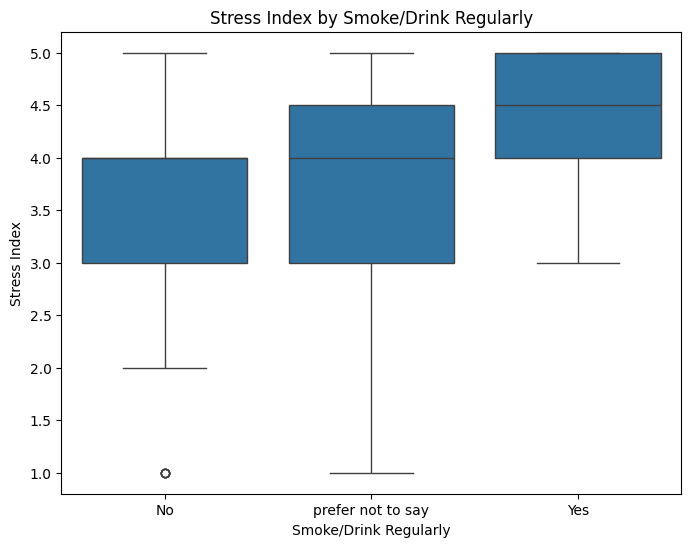

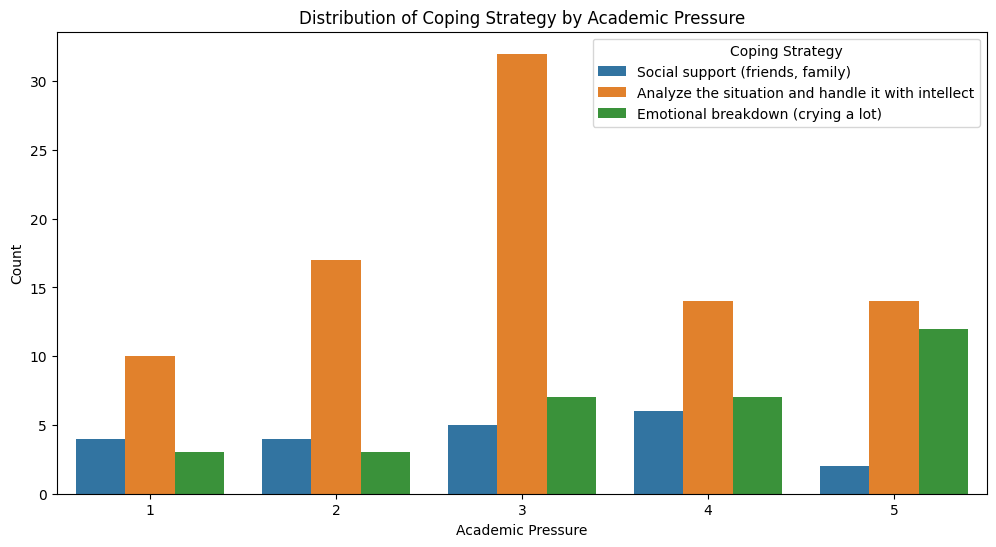

In [20]:
# Box plot for Smoke/Drink Regularly and Stress Index
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoke/Drink Regularly', y='Stress Index')
plt.title('Stress Index by Smoke/Drink Regularly')
plt.xlabel('Smoke/Drink Regularly')
plt.ylabel('Stress Index')
plt.show()

# Heatmap for Academic Pressure and Coping Strategy (requires converting categorical to numerical)
# Let's use a different approach for the relationship between Academic Pressure and Coping Strategy
# We can use a grouped bar plot or a heatmap of counts

# Grouped bar plot for Academic Pressure and Coping Strategy
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Academic Pressure', hue='Coping Strategy')
plt.title('Distribution of Coping Strategy by Academic Pressure')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.show()

From the box plot, we can observe how the distribution of 'Stress Index' varies for each category of 'Smoke/Drink Regularly'. The grouped bar plot shows the counts of each 'Coping Strategy' for different levels of 'Academic Pressure'.

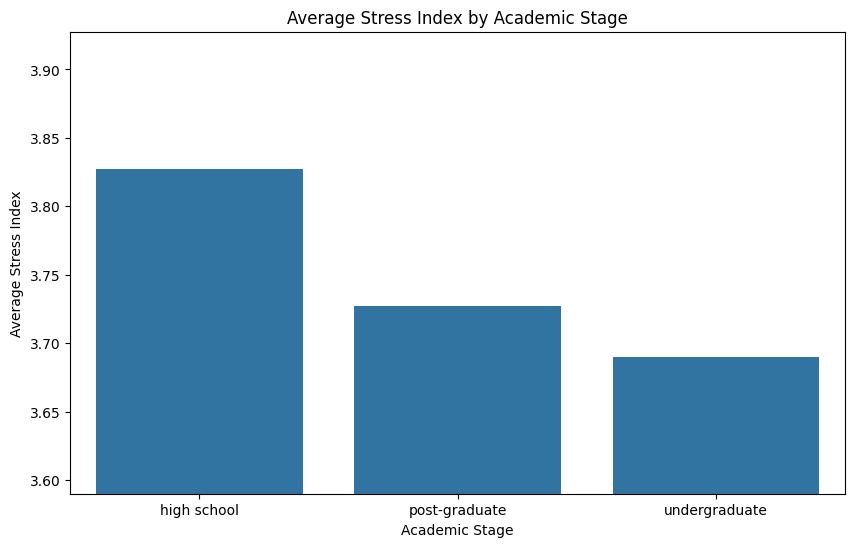

In [22]:
# Calculate the average Stress Index for each Academic Stage
avg_stress_by_academic_stage = df.groupby('Academic Stage')['Stress Index'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stress_by_academic_stage, x='Academic Stage', y='Stress Index')
plt.title('Average Stress Index by Academic Stage')
plt.xlabel('Academic Stage')
plt.ylabel('Average Stress Index')
plt.ylim(min(avg_stress_by_academic_stage['Stress Index']) - 0.1, max(avg_stress_by_academic_stage['Stress Index']) + 0.1) # Adjust the y-axis limits
plt.show()

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA test
model = ols('Q("Stress Index") ~ C(Q("Academic Stage"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("\nANOVA Table:")
display(anova_table)


ANOVA Table:


,sum_sq,df,F,PR(>F)
"C(Q(""Academic Stage""))",0.425965,2.0,0.19754,0.820981
Residual,147.709749,137.0,NaN,NaN


The p-value (PR(>F)) from the ANOVA table is 0.821, which is greater than the typical significance level of 0.05. This indicates that there is no statistically significant difference in the average stress index across the different academic stages in this dataset.

# Task
Analyze the provided dataset to identify combinations of categorical variables ('Academic Stage', 'Study Environment', 'Coping Strategy', 'Smoke/Drink Regularly') that result in the highest and lowest average 'Stress Index'.

## Group data by categorical variables

### Subtask:
Group the DataFrame by combinations of categorical variables ('Academic Stage', 'Study Environment', 'Coping Strategy', 'Smoke/Drink Regularly').


**Reasoning**:
Group the DataFrame by the specified categorical columns.



In [32]:
grouped_df = df.groupby(['Academic Stage', 'Study Environment', 'Coping Strategy', 'Smoke/Drink Regularly'])

## Calculate average stress index

### Subtask:
For each group, calculate the average 'Stress Index'.


**Reasoning**:
Calculate the mean Stress Index for each group and reset the index to prepare for finding the highest and lowest average stress indices.



In [33]:
average_stress_by_combination = grouped_df['Stress Index'].mean().reset_index()
display(average_stress_by_combination.head())

,Academic Stage,Study Environment,Coping Strategy,Smoke/Drink Regularly,Stress Index
0,high school,Noisy,Analyze the situation and handle it with intel...,No,3.600000
1,high school,Noisy,Emotional breakdown (crying a lot),No,4.333333
2,high school,Noisy,"Social support (friends, family)",No,4.000000
3,high school,Peaceful,Analyze the situation and handle it with intel...,No,4.111111
4,high school,Peaceful,Emotional breakdown (crying a lot),No,3.000000


## Identify highest and lowest average stress indices

### Subtask:
Sort the results to find the combinations with the highest and lowest average 'Stress Index'.


**Reasoning**:
Sort the DataFrame by 'Stress Index' to find the lowest and highest values and display the top rows of each sorted DataFrame.



In [34]:
# Sort in ascending order for lowest stress indices
lowest_stress_combinations = average_stress_by_combination.sort_values(by='Stress Index', ascending=True)

# Sort in descending order for highest stress indices
highest_stress_combinations = average_stress_by_combination.sort_values(by='Stress Index', ascending=False)

# Display the top few rows of the lowest stress combinations
print("Combinations with the Lowest Average Stress Index:")
display(lowest_stress_combinations.head())

# Display the top few rows of the highest stress combinations
print("\nCombinations with the Highest Average Stress Index:")
display(highest_stress_combinations.head())

Combinations with the Lowest Average Stress Index:


,Academic Stage,Study Environment,Coping Strategy,Smoke/Drink Regularly,Stress Index
5,high school,Peaceful,"Social support (friends, family)",No,1.5
4,high school,Peaceful,Emotional breakdown (crying a lot),No,3.0
23,undergraduate,Peaceful,Emotional breakdown (crying a lot),No,3.0
19,undergraduate,Noisy,"Social support (friends, family)",No,3.0
25,undergraduate,Peaceful,"Social support (friends, family)",prefer not to say,3.0



Combinations with the Highest Average Stress Index:


,Academic Stage,Study Environment,Coping Strategy,Smoke/Drink Regularly,Stress Index
7,high school,disrupted,Emotional breakdown (crying a lot),No,5.0
13,post-graduate,disrupted,"Social support (friends, family)",No,5.0
18,undergraduate,Noisy,Emotional breakdown (crying a lot),prefer not to say,5.0
17,undergraduate,Noisy,Emotional breakdown (crying a lot),Yes,5.0
27,undergraduate,disrupted,Analyze the situation and handle it with intel...,Yes,5.0


## Visualize the results

### Subtask:
Display the combinations with the highest and lowest average stress indices.


**Reasoning**:
Display the combinations with the lowest and highest average stress indices as requested by the subtask.



In [35]:
# Display the combinations with the lowest average stress index
print("Combinations with the Lowest Average Stress Index:")
display(lowest_stress_combinations)

# Display the combinations with the highest average stress index
print("\nCombinations with the Highest Average Stress Index:")
display(highest_stress_combinations)

Combinations with the Lowest Average Stress Index:


,Academic Stage,Study Environment,Coping Strategy,Smoke/Drink Regularly,Stress Index
5,high school,Peaceful,"Social support (friends, family)",No,1.500000
4,high school,Peaceful,Emotional breakdown (crying a lot),No,3.000000
23,undergraduate,Peaceful,Emotional breakdown (crying a lot),No,3.000000
19,undergraduate,Noisy,"Social support (friends, family)",No,3.000000
25,undergraduate,Peaceful,"Social support (friends, family)",prefer not to say,3.000000
22,undergraduate,Peaceful,Analyze the situation and handle it with intel...,prefer not to say,3.000000
9,post-graduate,Peaceful,Analyze the situation and handle it with intel...,No,3.250000
8,post-graduate,Noisy,Analyze the situation and handle it with intel...,No,3.500000
16,undergraduate,Noisy,Emotional breakdown (crying a lot),No,3.500000
20,undergraduate,Peaceful,Analyze the situation and handle it with intel...,No,3.516129



Combinations with the Highest Average Stress Index:


,Academic Stage,Study Environment,Coping Strategy,Smoke/Drink Regularly,Stress Index
7,high school,disrupted,Emotional breakdown (crying a lot),No,5.000000
13,post-graduate,disrupted,"Social support (friends, family)",No,5.000000
18,undergraduate,Noisy,Emotional breakdown (crying a lot),prefer not to say,5.000000
17,undergraduate,Noisy,Emotional breakdown (crying a lot),Yes,5.000000
27,undergraduate,disrupted,Analyze the situation and handle it with intel...,Yes,5.000000
21,undergraduate,Peaceful,Analyze the situation and handle it with intel...,Yes,4.500000
15,undergraduate,Noisy,Analyze the situation and handle it with intel...,Yes,4.500000
28,undergraduate,disrupted,Emotional breakdown (crying a lot),No,4.428571
1,high school,Noisy,Emotional breakdown (crying a lot),No,4.333333
30,undergraduate,disrupted,"Social support (friends, family)",No,4.200000


## Summary:

### Data Analysis Key Findings

*   The combination with the lowest average stress index (1.5) was "high school", "Peaceful" study environment, "Social support (friends, family)" coping strategy, and "No" for "Smoke/Drink Regularly".
*   Several combinations resulted in the highest average stress index (5.0). These combinations consistently involved a "disrupted" or "Noisy" study environment, regardless of academic stage, coping strategy, or smoking/drinking habits.

### Insights or Next Steps

*   The study environment appears to be a significant factor influencing stress levels, with disrupted or noisy environments correlating with higher stress.
*   Further analysis could investigate the specific factors within "disrupted" or "Noisy" environments that contribute most to stress and explore potential interventions.


In [28]:
# Convert the 'Timestamp' column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Find the minimum and maximum timestamps
earliest_timestamp = df['Timestamp'].min()
latest_timestamp = df['Timestamp'].max()

# Display the results
print(f"Earliest Timestamp: {earliest_timestamp}")
print(f"Latest Timestamp: {latest_timestamp}")

Earliest Timestamp: 2025-07-24 22:05:39
Latest Timestamp: 2025-08-18 22:40:13


In [30]:
# Filter the DataFrame for 'Noisy' and 'disrupted' study environments
filtered_df = df[df['Study Environment'].isin(['Noisy', 'disrupted'])]

# Get the value counts for 'Coping Strategy' in the filtered DataFrame
coping_strategy_counts = filtered_df['Coping Strategy'].value_counts()

# Display the most common coping strategies
print("Most common Coping Strategies in Noisy and Disrupted Study Environments:")
display(coping_strategy_counts)

Most common Coping Strategies in Noisy and Disrupted Study Environments:


,count
Coping Strategy,
Analyze the situation and handle it with intellect,38
Emotional breakdown (crying a lot),23
"Social support (friends, family)",9


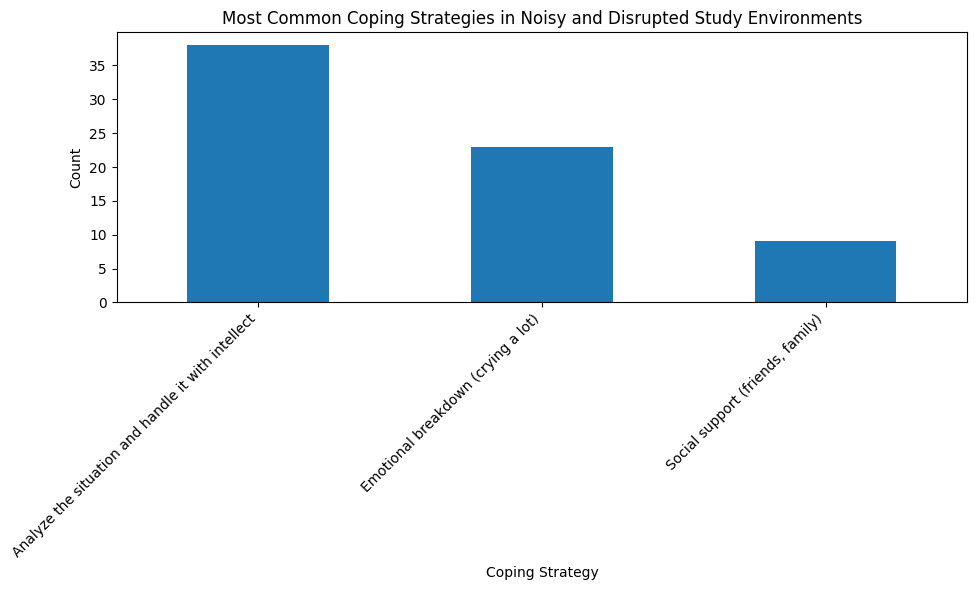

In [31]:
plt.figure(figsize=(10, 6))
coping_strategy_counts.plot(kind='bar')
plt.title('Most Common Coping Strategies in Noisy and Disrupted Study Environments')
plt.xlabel('Coping Strategy')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()